In [53]:
def timer(path):
    with open(path, "r") as file:
        lines = file.readlines()

    # 遍历每一行来查找关键数据
    for line in lines:
        if "Total wall time:" in line:
            time_str = line.split(": ", 1)[1]
            hours, minutes, seconds = map(int, time_str.split(":"))
            total_seconds = hours * 3600 + minutes * 60 + seconds
    return total_seconds

In [54]:
scale_hpc = []
for i in range(6, 10):
    path = "scale-hpc-" + str(2**i)
    scale_hpc.append(timer(path))
scale_hpc

[288, 161, 88, 50]

In [55]:
scale_rhino = []
for i in range(6, 10):
    path = "scale-rhino-" + str(2**i)
    scale_rhino.append(timer(path))
scale_rhino

[316, 185, 99, 58]

In [56]:
df = pd.DataFrame({
    'NP': ["64", "128", "256", "512"],
    'RHINO': scale_rhino,
    'VM cluster': scale_hpc
})
df

,NP,RHINO,VM cluster
0,64,316,288
1,128,185,161
2,256,99,88
3,512,58,50


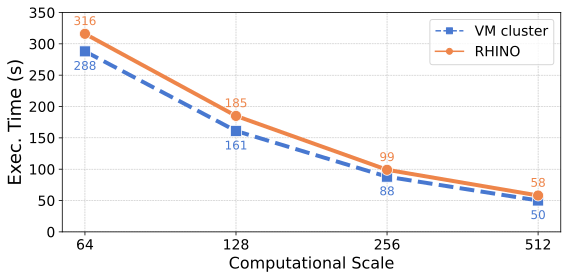

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import warnings
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
warnings.filterwarnings("ignore", category=FutureWarning, module="pandas")

colors = sns.color_palette("muted", 2)
palette = [sns.desaturate(color, 1) for color in colors] 
df_long = pd.melt(df, id_vars=['NP'], value_vars=['VM cluster', 'RHINO'], 
                 var_name='Method', value_name='Value')

markers_dict = {'VM cluster': 's', 'RHINO': 'o'} 

# Plotting
plt.figure(figsize=(8, 4))
ax = sns.lineplot(data=df_long, x="NP", y="Value", hue="Method", style='Method', markers=markers_dict, palette=palette, markersize = 11, lw=4)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)  
ax.set_ylim(0, 350)
lines = ax.get_lines()
for i, line in enumerate(lines):
    if i == 0:
        line.set_linestyle('--')
    elif i == 1:
        line.set_linestyle('-')
    elif i == 2:
        line.set_linestyle('--')
    else:
        line.set_linestyle('-')

# Add data values next to each point

for line in ax.lines:
    x, y = line.get_data()
    label = line.get_label()
    if x.size > 0:
        if label == "_child0":
            ax.text(x[0], y[0] - 15, f'{y[0]}', color=line.get_color(), verticalalignment='top', horizontalalignment='center', fontsize=12)
            ax.text(x[1], y[1] - 15, f'{y[1]}', color=line.get_color(), verticalalignment='top', horizontalalignment='center', fontsize=12)
            ax.text(x[2], y[2]- 15, f'{y[2]}', color=line.get_color(), verticalalignment='top', horizontalalignment='center', fontsize=12)
            ax.text(x[3], y[3]- 15, f'{y[3]}', color=line.get_color(), verticalalignment='top', horizontalalignment='center', fontsize=12)
        else:
            ax.text(x[0], y[0] + 10, f'{y[0]}', color=line.get_color(), verticalalignment='bottom', horizontalalignment='center', fontsize=12)
            ax.text(x[1], y[1] + 10, f'{y[1]}', color=line.get_color(), verticalalignment='bottom', horizontalalignment='center', fontsize=12)
            ax.text(x[2], y[2] + 10, f'{y[2]}', color=line.get_color(), verticalalignment='bottom', horizontalalignment='center', fontsize=12)
            ax.text(x[3], y[3] + 10, f'{y[3]}', color=line.get_color(), verticalalignment='bottom', horizontalalignment='center', fontsize=12)

plt.ylabel("Exec. Time (s)", fontsize=18)
plt.xlabel("Computational Scale", fontsize=16)

plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig("scale.pdf", format='pdf', bbox_inches='tight')
plt.show()